## Dataset Link: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
## required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)

In [2]:
## reading dataset
df = pd.read_csv('creditcard.csv')

## displaying first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
## shape of dataset
df.shape

(284807, 31)

In [4]:
## checking null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
## count the occurance of unique values in class column
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [7]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<Figure size 432x288 with 0 Axes>

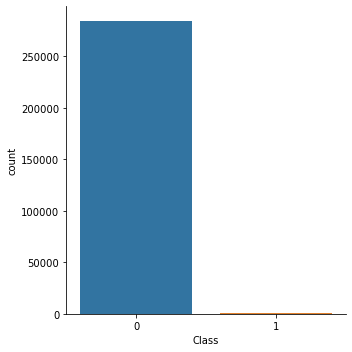

In [9]:
## countplot of classes
plt.figure(figsize=(6, 4))
sns.catplot(x = "Class", data = df, kind="count");
plt.show()

Text(0.5, 1.0, 'Genuine transactions')

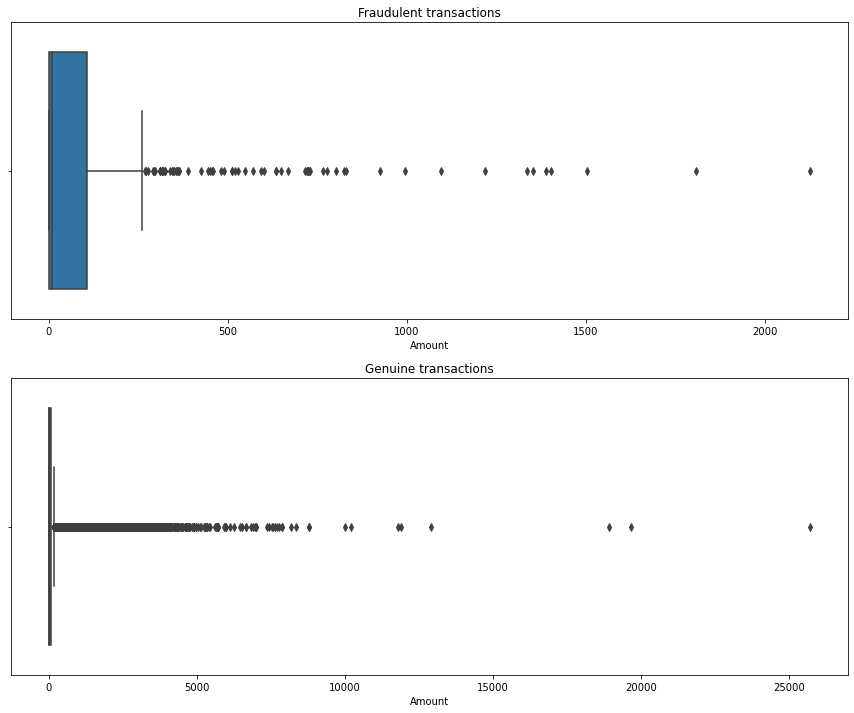

In [10]:
fig,(ax1,ax2)=plt.subplots(2,1, figsize=(15,12))
sns.boxplot(x="Amount",data = fraud,ax=ax1)
ax1.set_title("Fraudulent transactions")
sns.boxplot(x="Amount",data = valid,ax=ax2)
ax2.set_title("Genuine transactions")

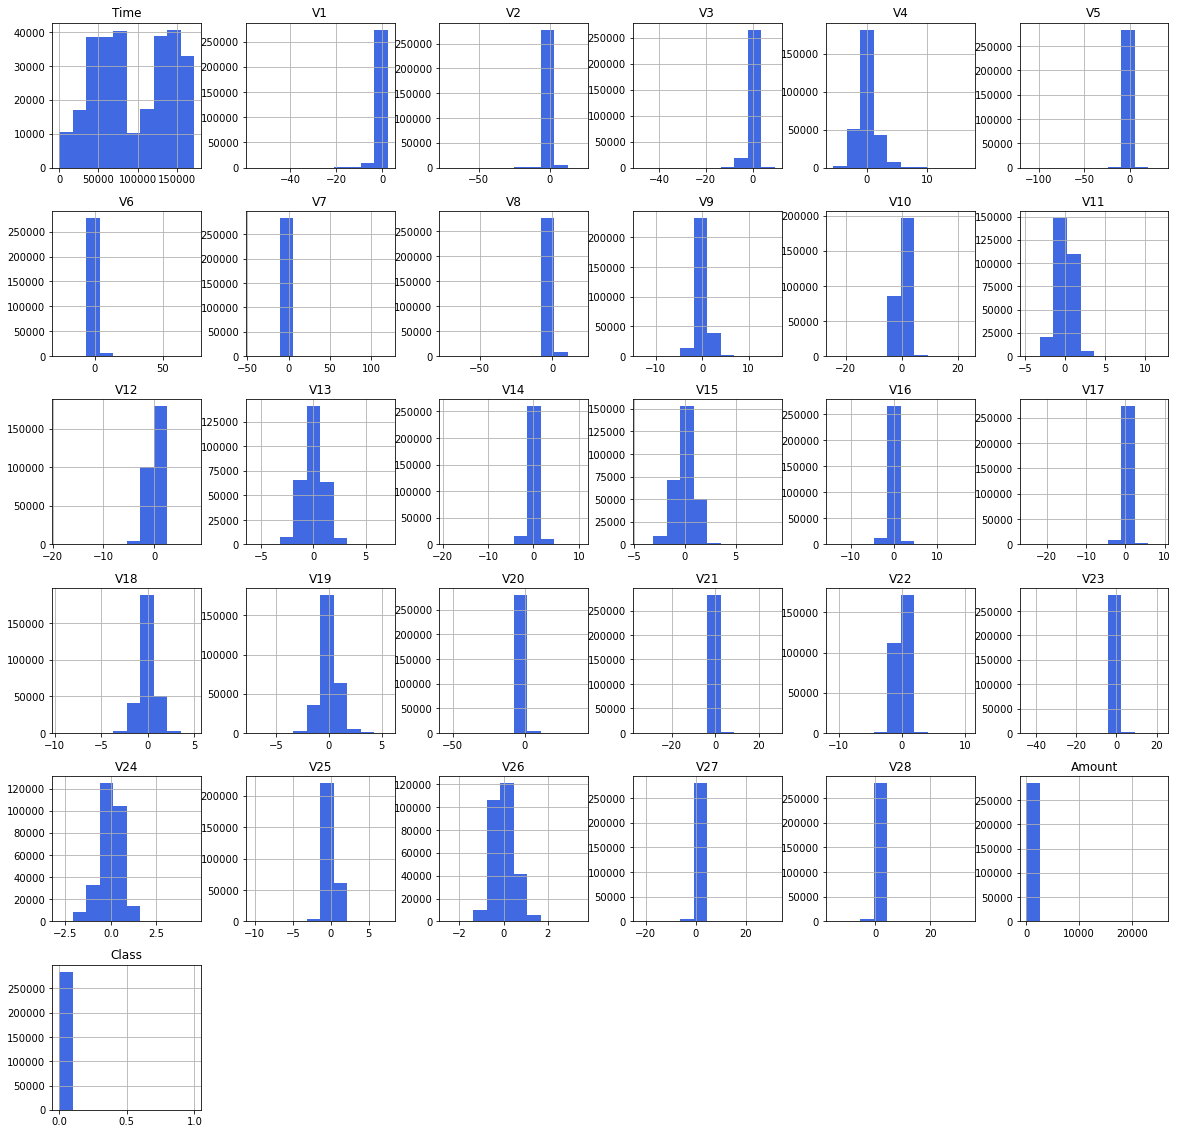

In [25]:
df.hist(figsize=(20,20),color='royalblue')
plt.show()

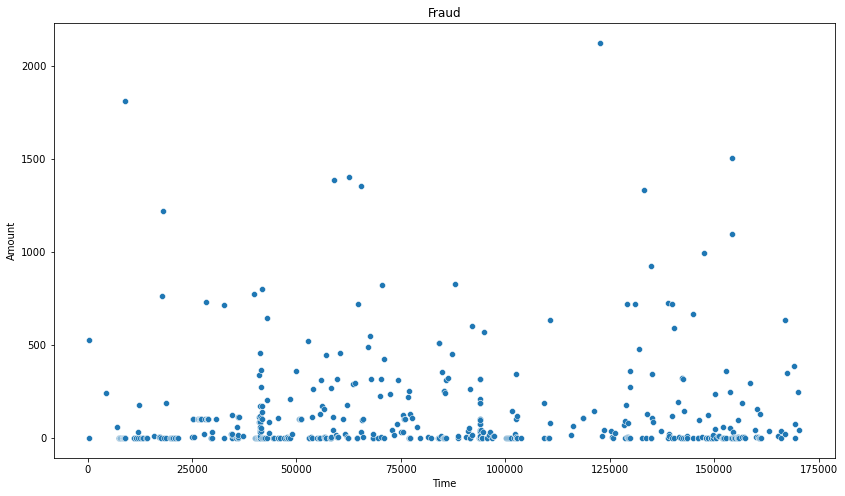

In [28]:
plt.figure(figsize=(14,8))

sns.scatterplot(y="Amount", x= "Time", data=fraud)
plt.title("Fraud")
plt.show()

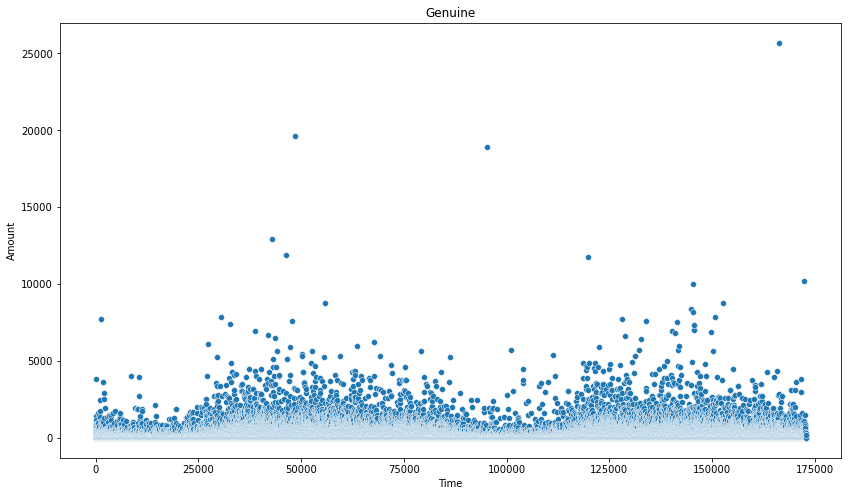

In [29]:
plt.figure(figsize=(14,8))

sns.scatterplot(y="Amount", x= "Time", data=valid)
plt.title("Genuine")
plt.show()

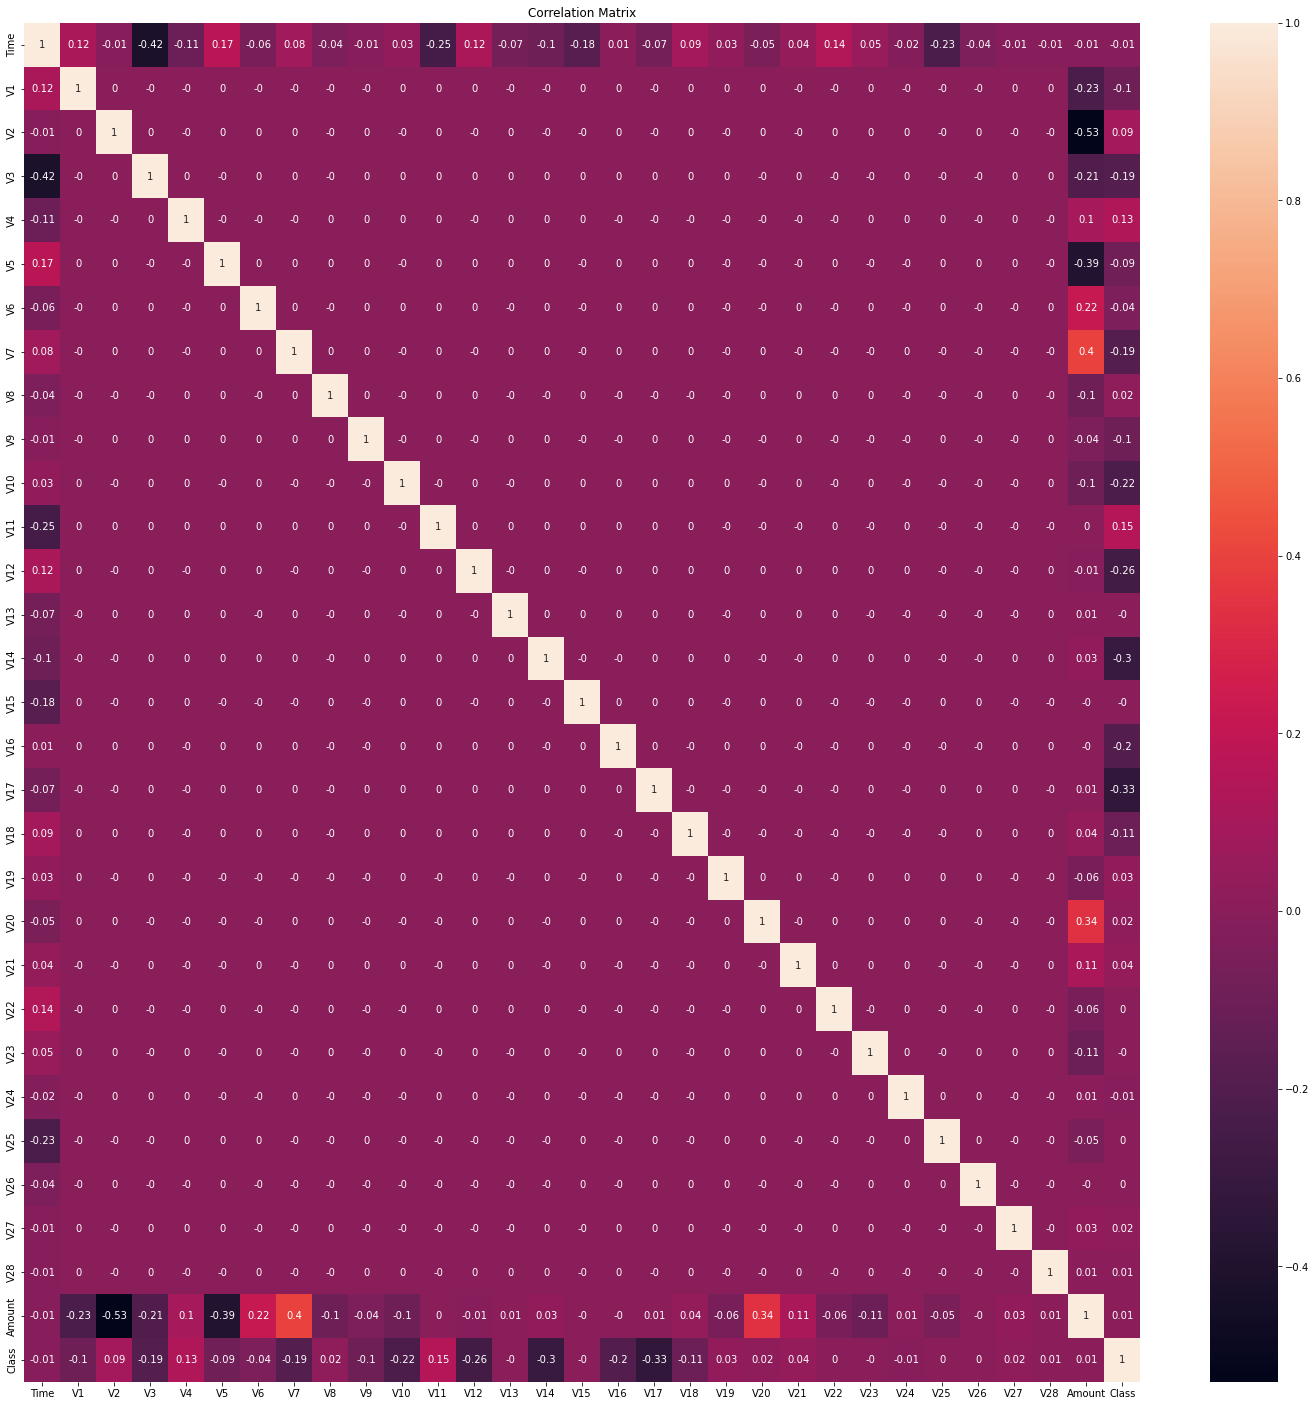

In [13]:
## checking correlation
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix")
sns.heatmap(round(df.corr(), 2), annot=True);

In [14]:
## checking correlation of 'dependent' variable with each "independent" variable
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


In [15]:
## dependent and independent variables 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [18]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
## Standard Scaler
sc=  StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
print(X_train.shape)
print(X_test.shape)

(213605, 30)
(71202, 30)


## Logistic Regression

In [21]:
lg = LogisticRegression()

## fit on training data
lg.fit(X_train, y_train)

LogisticRegression()

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.66      0.75       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9992696834358585
----------------------------------------------------------------------------------------------------



Text(69.0, 0.5, 'Actual')

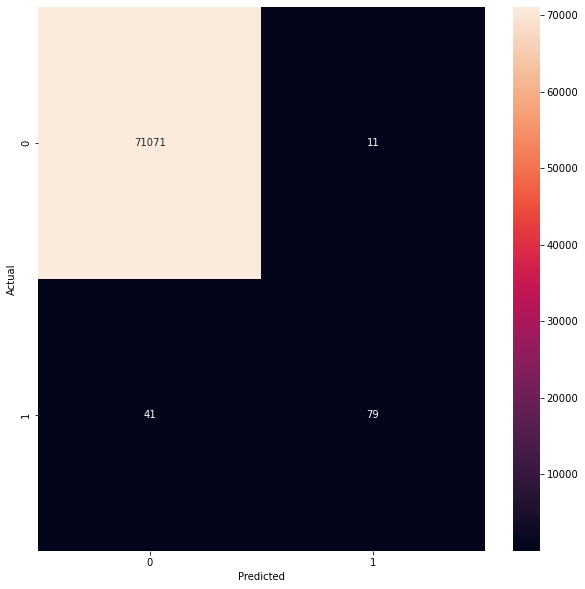

In [22]:
## prediction
pred = lg.predict(X_test)

print('Classification Report: \n', classification_report(y_test, pred))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(y_test, pred))
print("-" * 100)
print()
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Random Forest

In [23]:
rf = RandomForestClassifier()

## fit on training data
rf.fit(X_train, y_train)

RandomForestClassifier()

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.93      0.78      0.85       120

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9995365298727564
----------------------------------------------------------------------------------------------------



Text(69.0, 0.5, 'Actual')

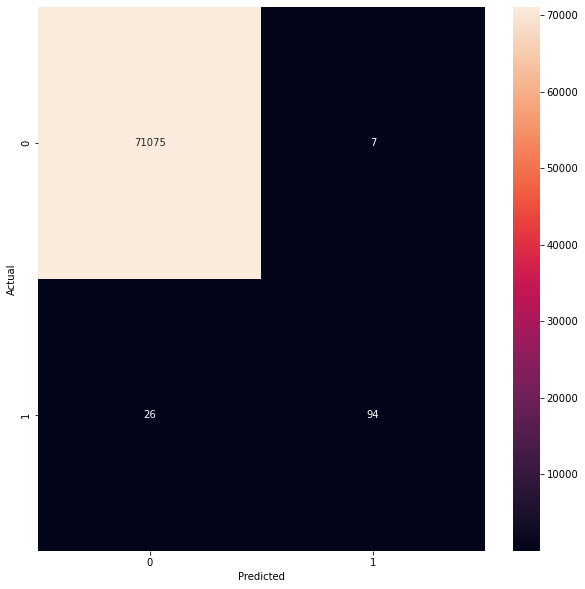

In [24]:
## prediction
pred = rf.predict(X_test)


print('Classification Report: \n', classification_report(y_test, pred))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(y_test, pred))
print("-" * 100)
print()
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
plt.xlabel("Predicted")
plt.ylabel("Actual")